In [1]:
import numpy as np
from send_help import *
from Functions import *
import pickle
from sklearn.neighbors import NearestNeighbors
import math

In [2]:
# with open('./Decomp_Hists_07_04_Dict_7.5A.pickle', 'rb') as handle:
#     N5 = pickle.load(handle)
    
with open('./Decomp_Hists_31bin_07_04_Dict_7.5A.pickle', 'rb') as handle:
    N5 = pickle.load(handle)

In [3]:
#*2 floor and total /2
def get_score(d):
    d = float(d)
    s = int(math.floor(d*2))
    return s


In [4]:
N=['GLY']
if tuple(N) in N5:
    s = (N5[tuple(N)])[get_score(float(15))]
    print(N5[tuple(N)][-1])
    print(s)

8.987956138774042e-05
8.987956138774042e-05


In [5]:
def Generate_List():
    from pathlib import Path
    path = Path('../get_folds/depth_db')
    i=0
    List = []
    Name = []
    for entry in path.iterdir():
        if entry.name.endswith('-residue_depth.pdb'):
            temp = []
            p = str(path) +"/"+ entry.name
            name = entry.name.split("-")[0]
            temp = read_pdb_files(p)
            Dict = gen_res_dict(temp)  #Switch to Single/Multi Chain Prediction Only
            data = get_data(Dict)
            data = np.array(data)
            Name.append(name)
            List.append(data[:,1:])
    return List,Name

List , Name = Generate_List()

In [6]:
# print((Name[0]),(List[0]))
for i in List[0]:
    # for i in N:
        if type(i[-1]) == str:
            print('The Depth is NAN!?',i,i[-1])
        else:
            print(i)
# print(len(List))

['  -2.177' '  -6.839' '   2.234' '  6.04']
['  -4.693' '  -4.857' '   6.258' '  8.51']
['  -7.823' '  -2.273' '   4.629' '  6.31']
[' -12.147' '  -2.076' '   5.788' '  6.40']
[' -12.418' '   2.745' '   6.235' '  7.83']
[' -10.157' '   6.151' '   2.523' ' 10.53']
['  -7.092' '   6.461' '   6.881' ' 12.53']
['  -2.848' '   8.094' '   4.186' ' 13.67']
['  -0.245' '  10.469' '   7.429' ' 13.30']
['   4.161' '   6.792' '   8.776' ' 12.98']
['   3.738' '   9.418' '  13.285' '  8.17']
['   6.603' '   6.386' '  15.272' '  6.55']
['   4.599' '   4.400' '  18.796' '  5.38']
['   1.210' '   6.643' '  14.903' '  8.97']
['  -1.725' '   4.301' '  11.610' ' 10.91']
['   3.046' '   3.159' '   8.582' ' 13.31']
['  -2.604' '   4.743' '   6.499' ' 13.64']
['  -0.809' '   4.068' '   1.438' ' 10.85']
['  -3.573' '   7.601' '   0.510' ' 10.97']
['  -1.940' '   5.757' '  -3.575' '  9.65']
['  -5.214' '   2.055' '  -3.898' '  5.13']
['  -7.413' '   4.583' '   0.603' '  7.30']
['  -8.791' '   8.447' '  -3.253

In [7]:
def R_N(inherit):
    indices = neighbors(inherit,7.5)
    newstars = yeet(indices)
    data = add_depth(inherit,newstars)
    return data
    

In [19]:
def R_score(ndata):
    score = []
    for i in ndata:
        N = i[:-1]
        if float(i[-1].strip()) >=16:
            score.append(0)
        else:
            if len(N)<=6: #Some neighbourhoods by default are less than 3 nbrs
                if tuple(N) in N5:
                        try:
                            s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                            score.append(s)
                        except:
                            score.append(0)
                else:
                    score.append(0)
                        # if s == 0:
                            # print(N5[tuple(N)])
                            # print("Score is zero here! ",str(N),"for bin: ",get_score(float(i[-1].strip())), "But the actual Depth given to nbr was: ",i[-1])
            else:
                while len(N)>6: #But if they are not then check if their scores and if not exist then decompose and again check.
                    if tuple(N) in N5:
                        try:
                            s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                            score.append(s)
                        except:
                            score.append(0)
                        # if s == 0:
                            # print(N5[tuple(N)])
                            # print("Score is zero here! ",str(N),"for bin: ",get_score(float(i[-1].strip())), "But the actual score given to nbr was: ",i[-1])
                        break
                    elif len(N) == 7: #i.e. accepting scores until atleast 2 nbrs still exist (decompose until 2 nbrs)
                        if tuple(N) in N5:
                            s = (N5[tuple(N)])[get_score(float(i[-1].strip()))]
                            # print(i[-1])
                            score.append(s)
                            break
                        else:
                            score.append(0)
                            # print(N)
                            break
                    else:
                        N = N[:-1]
    return (score)


In [20]:
f = 'MRGMLPLFEPKGRVLLVDGHHLAYRTFHALKGLTTSRGEPVQAVYGFAKSLLKALKEDGDAVIVVFDAKAPSFRHEAYGGYKAGRAPTPEDFPRQLALIKELVDLLGLARLEVPGYEADDVLASLAKKAEKEGYEVRILTADKDLYQLLSDRIHVLHPEGYLITPAWLWEKYGLRPDQWADYRALTGDESDNLPGVKGIGEKTARKLLEEWGSLEALLKNLDRLKPAIREKILAHMDDLKLSWDLAKVRTDLPLEVDFAKRREPDRERLRAFLERLEFGSLLHEF'
print(len(f))
seq = Fasta_to_AA(f)  #x,z, and b are extra AA entries nowhere found in the Dict we are using to score, How do we acount for these?


285


In [21]:
v = Inherit(seq,List[0],0)
v = np.array(v)
print(len(v))
N = R_N(v)
print(len(List[0]))
m = R_score(N)
# for i in N:
#     print(float(i[-1].strip()))
    # for i in N:
        # if type(N[-1]) == str:
        #     print('The Depth is NAN!?',i,i[-1])
        # else:
        #     print(i,i[-1])

285
285


In [22]:
print(len(m))

285


In [23]:
# print(len(s))
# s_list = [s]  # Convert float to a list
print(m)
print(sum(m))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3701492537313433, 0.2553191489361702, 0, 1.0098039215686274, 0.3146067415730337, 0, 0, 0, 0.19891282464264143, 0.09573934837092732, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2184873949579832, 0.10493827160493827, 0.23845193508114856, 0.15267175572519084, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.28296901273120345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.41714285714285715, 0, 0, 0, 0.7536231884057971, 0, 0.6317460317460317, 0, 0, 0.31665941713788603, 0.5877390326209224, 0, 0, 0.45111624326404925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.22956616347069222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.368, 0, 0.0379746835443038, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7777777777777778, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006514657980456026, 0.21505376344086022, 0, 0, 0, 0, 0, 0, 0, 0, 0.18358173645611545, 0, 0, 0, 0.17391304347826086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.012187

In [24]:
def count_zeroes(arr):
    zero_count = 0
    for i in arr:
        if float(i) == 0.0:
            zero_count += 1
    return zero_count
print(count_zeroes(m))

225


In [25]:
#Part to Automate for all Folds must be inherited, starting with No Shift
Scored_Inherited_folds={}
Check_zeroes={}
i=0
while i in range(0,len(List)):
    try:
        a = Inherit(seq,List[i],0)
        a = np.array(a)
        # print(len(a))
        N = R_N(a)
        s = R_score(N)
        # print(sum(s))
        Scored_Inherited_folds[str(Name[i])]=sum(s)
        Check_zeroes[str(Name[i])]=count_zeroes(s)
        
    except Exception as e:
        print(e)
        # if e != 'Invalid input':
        #     print(Name[i],i)
        # if len(List[i])> len(seq):
        #     print(Name[i],i)
    i+=1
print(i)


sorted_keys = sorted(Scored_Inherited_folds, key=Scored_Inherited_folds.get, reverse=True)

sorted_dict = {}
for key in sorted_keys:
    sorted_dict[key] = Scored_Inherited_folds[key]

# reordered = sortD(Scored_Inherited_folds)
with open('./Pred.pickle', 'wb') as handle:
    pickle.dump(sorted_dict, handle)   

with open('./Pred_z.pickle', 'wb') as handle:
    pickle.dump(Check_zeroes, handle)

Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longer than fold
Invalid input: sequence is longe

In [26]:
print(Check_zeroes)

{'5_3_exonuclease': 225, '6PGD': 251, 'AAA': 245, 'aadh': 252, 'aakinase': 250, 'aat': 233, 'ace': 246, 'acid_phosphat': 248, 'aconitase': 263, 'actin': 250, 'Adenylsucc_synt': 243, 'adh': 248, 'ADP_PFK_GK': 248, 'AFOR': 248, 'ALAD': 246, 'AlaDh_PNT': 233, 'aldedh': 250, 'aldose': 249, 'aldosered': 252, 'Ald_Xan_dh_2': 233, 'alk_phosphatase': 224, 'alpha': 248, 'Amidase': 242, 'Amidinotransferase': 249, 'aminobp': 245, 'aminotran_5': 239, 'Amino_oxidase': 236, 'Amino_oxidase_D1': 235, 'AMP': 240, 'annexin': 246, 'Anperoxidase': 212, 'apbact': 262, 'arginase': 259, 'Arginosuc_synth': 242, 'ARM': 254, 'arrestin_NC': 227, 'Asn_synthase': 252, 'Asn_synthase_NC': 249, 'asp': 245, 'asprs': 223, 'ATP': 233, 'Bacterial_PQQ': 230, 'bac_lipase': 247, 'bac_luciferase': 258, 'Band_41_NME': 236, 'BChl_A': 235, 'Beta_elim_lyase': 236, 'biopterin_H': 240, 'bontoxilysin': 234, 'cat': 224, 'CCP_MauG_NC': 249, 'chorismate_bind': 228, 'citrate_synt': 234, 'CN_hydrolase': 254, 'CoA_trans': 248, 'CODH': 25

In [27]:
with open('./Pred_z.pickle', 'rb') as f:
    F = pickle.load(f)
print("This is the number of Folds Inherited Successfully: ",len(F))


for key, value in F.items():
    print("Name of Fold    "+str(key)+"    Total No. of Zeroes: "+str(value))

This is the number of Folds Inherited Successfully:  285
Name of Fold    5_3_exonuclease    Total No. of Zeroes: 225
Name of Fold    6PGD    Total No. of Zeroes: 251
Name of Fold    AAA    Total No. of Zeroes: 245
Name of Fold    aadh    Total No. of Zeroes: 252
Name of Fold    aakinase    Total No. of Zeroes: 250
Name of Fold    aat    Total No. of Zeroes: 233
Name of Fold    ace    Total No. of Zeroes: 246
Name of Fold    acid_phosphat    Total No. of Zeroes: 248
Name of Fold    aconitase    Total No. of Zeroes: 263
Name of Fold    actin    Total No. of Zeroes: 250
Name of Fold    Adenylsucc_synt    Total No. of Zeroes: 243
Name of Fold    adh    Total No. of Zeroes: 248
Name of Fold    ADP_PFK_GK    Total No. of Zeroes: 248
Name of Fold    AFOR    Total No. of Zeroes: 248
Name of Fold    ALAD    Total No. of Zeroes: 246
Name of Fold    AlaDh_PNT    Total No. of Zeroes: 233
Name of Fold    aldedh    Total No. of Zeroes: 250
Name of Fold    aldose    Total No. of Zeroes: 249
Name of F

In [28]:
with open('./Pred.pickle', 'rb') as f:
    D = pickle.load(f)
print("This is the number of Folds Inherited Successfully: ",len(D))


for key, value in D.items():
    print("Name of Fold    "+str(key)+"    Cumulative Score: "+str(value))

This is the number of Folds Inherited Successfully:  285
Name of Fold    GFO_IDH_MocA_NC    Cumulative Score: 36.028261468240764
Name of Fold    CytoC_RC    Cumulative Score: 35.63357543104492
Name of Fold    Phage_F    Cumulative Score: 35.094766020289846
Name of Fold    Inos    Cumulative Score: 34.23548840757863
Name of Fold    PPTA    Cumulative Score: 33.69076639193411
Name of Fold    E1_dehydrog    Cumulative Score: 31.911540060141114
Name of Fold    F_bP_aldolase    Cumulative Score: 31.016728779648197
Name of Fold    lipoxygenase    Cumulative Score: 30.78861500703886
Name of Fold    Parvo_coat2    Cumulative Score: 30.266867910433902
Name of Fold    ku    Cumulative Score: 30.265780508604127
Name of Fold    FAA_hydrolase    Cumulative Score: 30.225422754029104
Name of Fold    Transpeptidase    Cumulative Score: 29.84478130454004
Name of Fold    Transglutamin_NC    Cumulative Score: 29.663847434631172
Name of Fold    Peptidase_M16    Cumulative Score: 29.363326228093015
Name of

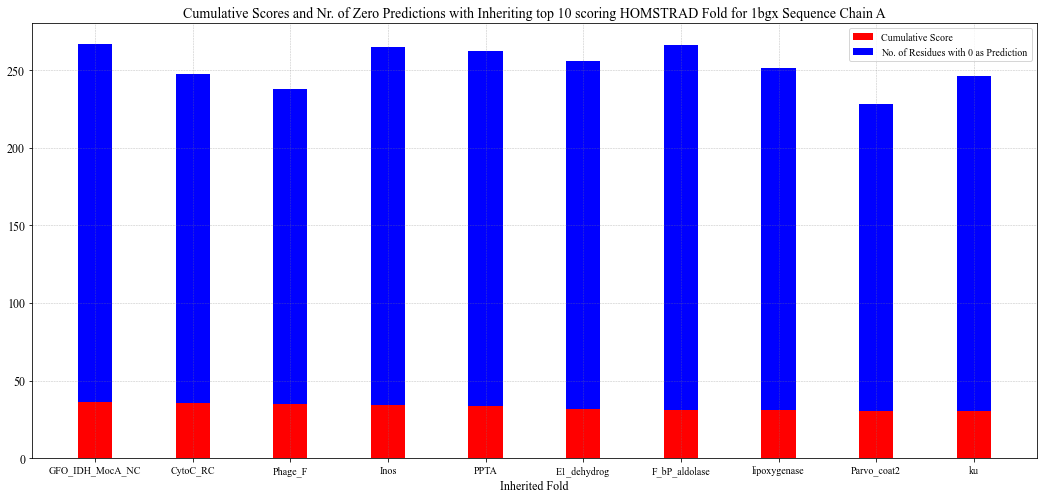

In [29]:
import os
# import sys
import matplotlib.pyplot as plt
#Randomly no specific Chain inherited, Chain B inherited Representative's Chain A's and following
plt.rcParams['font.family'] = 'Times New Roman'
current_dir = os.getcwd()

fig, ax = plt.subplots(figsize=(18, 8))

# labels = list(D.keys())
# values1 = list(D[:10].values())
# values2 = list(F[:10].values())

labels = list(D.keys())[:10]
values1 = [D.get(k, 0) for k in labels]
values2 = [F.get(k, 0) for k in labels]

x = labels
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
ax.bar(x, values1, width=0.35, label='Cumulative Score', color='r')
ax.bar(x, values2, bottom=values1, width=0.35, label='No. of Residues with 0 as Prediction', color='b')

ax.set_xticks([i for i in x])
ax.set_xticklabels(labels, fontsize=10)
ax.tick_params(axis='y', labelsize=12)

ax.set_xlabel('Inherited Fold', fontsize=12)
ax.set_ylabel('', fontsize=12) # Set y-axis label with font size

ax.set_title('Cumulative Scores and Nr. of Zero Predictions with Inheriting top 10 scoring HOMSTRAD Fold for 1bgx Sequence Chain A', fontsize=14)
# ax.legend()
ax.legend(loc='upper right')
# turn on the grid


# ax.grid(axis='y', which='both')

# modify the color of the grid
# ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.savefig('./plot_5-3exoAchain_7.5_7_try2.png',dpi=400, bbox_inches='tight')
plt.show()
